In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing data
energydata = pd.read_csv('energydata_complete.csv')

In [55]:
#question 12
x = energydata['T2']

y = energydata['T9']

y.head()

0    17.033333
1    17.066667
2    17.000000
3    17.000000
4    17.000000
Name: T9, dtype: float64

In [45]:
x.head()

0    19.2
1    19.2
2    19.2
3    19.2
4    19.2
Name: T2, dtype: float64

In [4]:
from sklearn.model_selection import train_test_split

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 42)

In [57]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((11841,), (7894,), (11841,), (7894,))

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
linear_model = LinearRegression()

In [51]:
linear_model.fit(x_train, y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[18.73       26.39       26.85666667 ... 18.2        20.434
 19.89      ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
linear_model.score(x_test)

In [9]:
#question 13
categ_col = energydata.select_dtypes(include=['object', 'category']).columns

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le = LabelEncoder()
for i in categ_col:
    energydata[i] = le.fit_transform(energydata[i])

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
#normalising data to a common scale
scaler = MinMaxScaler()

In [14]:
n_df = pd.DataFrame(scaler.fit_transform(energydata), columns=energydata.columns)

In [15]:
f_df = n_df.drop(columns=['date', 'lights'])

In [16]:
Appliance_target = n_df['Appliances']

In [58]:
f_df.shape, Appliance_target.shape

((19735, 27), (19735,))

In [17]:
!pip install catboost

In [18]:
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [19]:
x_train, x_test, y_train, y_test = train_test_split(f_df, Appliance_target, test_size=0.3, random_state = 42 )

In [20]:
models = {"KNeighborsRegressor":KNeighborsRegressor(),
         "Decisiontree":DecisionTreeRegressor(),
         "linear":LinearRegression(),
         "Randomforest":RandomForestRegressor(),
         "ridge":Ridge(),
         "Catboost":CatBoostRegressor(),
         "SVR":SVR(),}

In [21]:
#setting up a function to fit
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    fits and evaluates given machine learning models
    models: a dictionary of different sklearn ml models
    x_train:training data (no labels)
    x_test:testing data (no labels)
    y_train:training labels
    y_test:testing labels
    """
    np.random.seed(42)
    
    model_scores= {}
    
    for name, model in models.items():
        
        model.fit(x_train, y_train)
        
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [22]:
%%time
scores = fit_and_score(models=models,
                      x_train=x_train,
                      x_test=x_test,
                      y_train=y_train,
                      y_test=y_test)
scores

Learning rate set to 0.061994
0:	learn: 0.0908918	total: 686ms	remaining: 11m 25s
1:	learn: 0.0858890	total: 697ms	remaining: 5m 47s
2:	learn: 0.0813287	total: 706ms	remaining: 3m 54s
3:	learn: 0.0769619	total: 719ms	remaining: 2m 59s
4:	learn: 0.0729385	total: 732ms	remaining: 2m 25s
5:	learn: 0.0688321	total: 746ms	remaining: 2m 3s
6:	learn: 0.0651897	total: 760ms	remaining: 1m 47s
7:	learn: 0.0616329	total: 773ms	remaining: 1m 35s
8:	learn: 0.0583366	total: 785ms	remaining: 1m 26s
9:	learn: 0.0553142	total: 802ms	remaining: 1m 19s
10:	learn: 0.0523202	total: 820ms	remaining: 1m 13s
11:	learn: 0.0495167	total: 832ms	remaining: 1m 8s
12:	learn: 0.0468011	total: 845ms	remaining: 1m 4s
13:	learn: 0.0443901	total: 857ms	remaining: 1m
14:	learn: 0.0420386	total: 871ms	remaining: 57.2s
15:	learn: 0.0397412	total: 890ms	remaining: 54.7s
16:	learn: 0.0375976	total: 917ms	remaining: 53s
17:	learn: 0.0356046	total: 954ms	remaining: 52s
18:	learn: 0.0336489	total: 971ms	remaining: 50.1s
19:	lea

178:	learn: 0.0014759	total: 2.69s	remaining: 12.3s
179:	learn: 0.0014734	total: 2.7s	remaining: 12.3s
180:	learn: 0.0014608	total: 2.71s	remaining: 12.3s
181:	learn: 0.0014530	total: 2.72s	remaining: 12.2s
182:	learn: 0.0014416	total: 2.73s	remaining: 12.2s
183:	learn: 0.0014348	total: 2.74s	remaining: 12.2s
184:	learn: 0.0014298	total: 2.75s	remaining: 12.1s
185:	learn: 0.0014243	total: 2.76s	remaining: 12.1s
186:	learn: 0.0014203	total: 2.77s	remaining: 12s
187:	learn: 0.0014172	total: 2.77s	remaining: 12s
188:	learn: 0.0014119	total: 2.78s	remaining: 11.9s
189:	learn: 0.0014023	total: 2.79s	remaining: 11.9s
190:	learn: 0.0013993	total: 2.8s	remaining: 11.9s
191:	learn: 0.0013794	total: 2.81s	remaining: 11.8s
192:	learn: 0.0013695	total: 2.81s	remaining: 11.8s
193:	learn: 0.0013610	total: 2.82s	remaining: 11.7s
194:	learn: 0.0013521	total: 2.83s	remaining: 11.7s
195:	learn: 0.0013469	total: 2.84s	remaining: 11.6s
196:	learn: 0.0013423	total: 2.85s	remaining: 11.6s
197:	learn: 0.0013

337:	learn: 0.0007970	total: 4.09s	remaining: 8s
338:	learn: 0.0007948	total: 4.1s	remaining: 7.99s
339:	learn: 0.0007924	total: 4.11s	remaining: 7.98s
340:	learn: 0.0007915	total: 4.12s	remaining: 7.97s
341:	learn: 0.0007903	total: 4.13s	remaining: 7.95s
342:	learn: 0.0007880	total: 4.14s	remaining: 7.93s
343:	learn: 0.0007862	total: 4.15s	remaining: 7.92s
344:	learn: 0.0007843	total: 4.16s	remaining: 7.9s
345:	learn: 0.0007822	total: 4.17s	remaining: 7.88s
346:	learn: 0.0007795	total: 4.18s	remaining: 7.86s
347:	learn: 0.0007785	total: 4.18s	remaining: 7.84s
348:	learn: 0.0007763	total: 4.19s	remaining: 7.82s
349:	learn: 0.0007735	total: 4.2s	remaining: 7.8s
350:	learn: 0.0007715	total: 4.21s	remaining: 7.79s
351:	learn: 0.0007692	total: 4.22s	remaining: 7.77s
352:	learn: 0.0007674	total: 4.23s	remaining: 7.75s
353:	learn: 0.0007656	total: 4.24s	remaining: 7.73s
354:	learn: 0.0007629	total: 4.25s	remaining: 7.71s
355:	learn: 0.0007596	total: 4.25s	remaining: 7.69s
356:	learn: 0.00075

512:	learn: 0.0005285	total: 5.67s	remaining: 5.38s
513:	learn: 0.0005273	total: 5.68s	remaining: 5.37s
514:	learn: 0.0005273	total: 5.68s	remaining: 5.35s
515:	learn: 0.0005264	total: 5.69s	remaining: 5.34s
516:	learn: 0.0005255	total: 5.71s	remaining: 5.33s
517:	learn: 0.0005245	total: 5.71s	remaining: 5.32s
518:	learn: 0.0005238	total: 5.72s	remaining: 5.3s
519:	learn: 0.0005231	total: 5.73s	remaining: 5.29s
520:	learn: 0.0005227	total: 5.74s	remaining: 5.28s
521:	learn: 0.0005215	total: 5.75s	remaining: 5.26s
522:	learn: 0.0005210	total: 5.75s	remaining: 5.25s
523:	learn: 0.0005199	total: 5.76s	remaining: 5.23s
524:	learn: 0.0005197	total: 5.77s	remaining: 5.22s
525:	learn: 0.0005187	total: 5.78s	remaining: 5.21s
526:	learn: 0.0005176	total: 5.79s	remaining: 5.19s
527:	learn: 0.0005173	total: 5.79s	remaining: 5.18s
528:	learn: 0.0005164	total: 5.8s	remaining: 5.17s
529:	learn: 0.0005156	total: 5.81s	remaining: 5.15s
530:	learn: 0.0005149	total: 5.82s	remaining: 5.14s
531:	learn: 0.

671:	learn: 0.0004106	total: 7.07s	remaining: 3.45s
672:	learn: 0.0004096	total: 7.07s	remaining: 3.44s
673:	learn: 0.0004088	total: 7.08s	remaining: 3.43s
674:	learn: 0.0004084	total: 7.09s	remaining: 3.42s
675:	learn: 0.0004069	total: 7.1s	remaining: 3.4s
676:	learn: 0.0004063	total: 7.11s	remaining: 3.39s
677:	learn: 0.0004058	total: 7.12s	remaining: 3.38s
678:	learn: 0.0004054	total: 7.13s	remaining: 3.37s
679:	learn: 0.0004047	total: 7.14s	remaining: 3.36s
680:	learn: 0.0004043	total: 7.14s	remaining: 3.35s
681:	learn: 0.0004039	total: 7.16s	remaining: 3.34s
682:	learn: 0.0004032	total: 7.16s	remaining: 3.33s
683:	learn: 0.0004028	total: 7.17s	remaining: 3.31s
684:	learn: 0.0004026	total: 7.18s	remaining: 3.3s
685:	learn: 0.0004020	total: 7.19s	remaining: 3.29s
686:	learn: 0.0004014	total: 7.2s	remaining: 3.28s
687:	learn: 0.0004010	total: 7.21s	remaining: 3.27s
688:	learn: 0.0004003	total: 7.21s	remaining: 3.26s
689:	learn: 0.0003990	total: 7.22s	remaining: 3.25s
690:	learn: 0.00

833:	learn: 0.0003242	total: 8.67s	remaining: 1.73s
834:	learn: 0.0003236	total: 8.68s	remaining: 1.72s
835:	learn: 0.0003231	total: 8.69s	remaining: 1.7s
836:	learn: 0.0003228	total: 8.7s	remaining: 1.69s
837:	learn: 0.0003224	total: 8.71s	remaining: 1.68s
838:	learn: 0.0003222	total: 8.72s	remaining: 1.67s
839:	learn: 0.0003218	total: 8.73s	remaining: 1.66s
840:	learn: 0.0003216	total: 8.73s	remaining: 1.65s
841:	learn: 0.0003213	total: 8.74s	remaining: 1.64s
842:	learn: 0.0003206	total: 8.75s	remaining: 1.63s
843:	learn: 0.0003201	total: 8.76s	remaining: 1.62s
844:	learn: 0.0003198	total: 8.77s	remaining: 1.61s
845:	learn: 0.0003193	total: 8.78s	remaining: 1.6s
846:	learn: 0.0003186	total: 8.79s	remaining: 1.59s
847:	learn: 0.0003183	total: 8.79s	remaining: 1.58s
848:	learn: 0.0003181	total: 8.8s	remaining: 1.56s
849:	learn: 0.0003176	total: 8.81s	remaining: 1.55s
850:	learn: 0.0003175	total: 8.82s	remaining: 1.54s
851:	learn: 0.0003171	total: 8.83s	remaining: 1.53s
852:	learn: 0.00

Wall time: 30.6 s


{'KNeighborsRegressor': 0.6962156355571283,
 'Decisiontree': 0.9999639355039677,
 'linear': 1.0,
 'Randomforest': 0.9999704025238243,
 'ridge': 0.9999309938827238,
 'Catboost': 0.9998926413076917,
 'SVR': 0.5337094780119693}

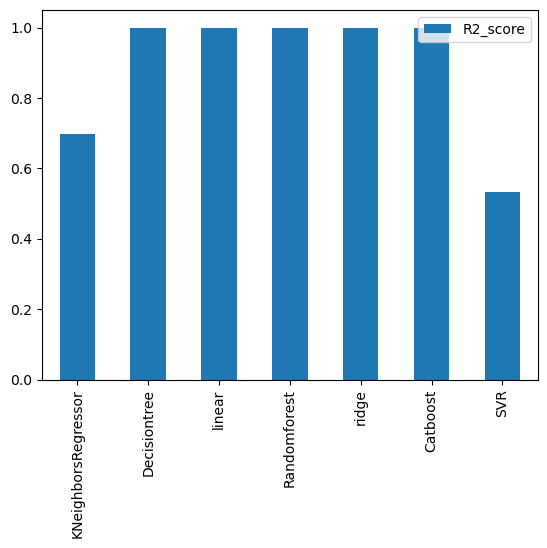

In [23]:
model_compare = pd.DataFrame(scores, index=['R2_score'])
model_compare.T.plot.bar();

In [24]:
linear_model = LinearRegression()

linear_model.fit(x_train, y_train)

LinearRegression()

In [25]:
linear_model.score(x_test, y_test)

1.0

In [26]:
y_pred = linear_model.predict(x_test)
y_pred[:5]

array([0.02803738, 0.07476636, 0.03738318, 0.03738318, 0.05607477])

In [27]:
mae = mean_absolute_error(y_test, y_pred)
mae

1.163576517929915e-16

In [28]:
from sklearn.metrics import r2_score

In [29]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

1.8896605646284427e-16

In [30]:
r2_score = r2_score(y_test, y_pred)
round(r2_score, 2)

1.0

In [37]:
def get_weights_df(model, feat, col_name):
    weights=pd.Series(model.coef_, feat.columns).sort_values()
    weights_df=pd.DataFrame(weights).reset_index()
    weights_df.columns=['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df

linear_model_weights=get_weights_df(linear_model, x_train, 'Linear_Model_Weight')

linear_model_weights

,Features,Linear_Model_Weight
0,RH_8,-1.553397e-16
1,T2,-1.552275e-16
2,Windspeed,-1.530044e-16
3,RH_7,-9.834812e-17
4,T7,-9.200157e-17
5,T9,-6.952158e-17
6,T4,-5.152382e-17
7,Visibility,-4.882938e-17
8,rv2,-4.829524e-17
9,rv1,-4.829524e-17


In [33]:
#question 18
ridge_reg = Ridge(alpha = 0.4)
ridge_reg.fit(x_train, y_train)
ridge_reg.score(x_test, y_test)

0.9999887665018938

In [34]:
from sklearn.linear_model import Lasso

In [35]:
#question 19 and 20
lasso_reg = Lasso(alpha = 0.001)
lasso_reg.fit(x_train, y_train)
lasso_reg.score(x_test, y_test)

0.9883340716449862

In [36]:
def get_weights_df(model, feat, col_name):
    weights=pd.Series(model.coef_, feat.columns).sort_values()
    weights_df=pd.DataFrame(weights).reset_index()
    weights_df.columns=['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df

lasso_model_weights=get_weights_df(lasso_reg, x_train, 'Linear_Model_Weight')

lasso_model_weights

,Features,Linear_Model_Weight
0,T7,0.000000
1,Tdewpoint,0.000000
2,Visibility,0.000000
3,Windspeed,0.000000
4,RH_out,-0.000000
5,Press_mm_hg,-0.000000
6,T_out,0.000000
7,RH_9,-0.000000
8,T9,0.000000
9,RH_8,-0.000000
